In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from fitter import Fitter

In [2]:
# load the transaction data
df1 = pd.read_csv("POS_Data/POS_transactions_20171207-20171219.csv")
df2 = pd.read_csv("POS_Data/POS_transactions_20190213-20190226.csv")
df3 = pd.read_csv("POS_Data/POS_transactions_20190328-20190410.csv")

data = pd.concat((df1,df2,df3))

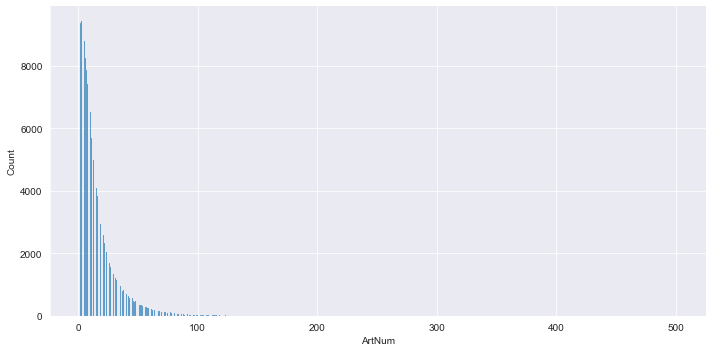

In [3]:
sns.displot(data['ArtNum'], kind='hist',aspect=2)

In [4]:
# create numpy array for fitter
num_items = data['ArtNum'].values

/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
exponnorm,0.000027,4003.318894,-3.677544e+06,inf
expon,0.000027,3973.836845,-3.676606e+06,inf
wald,0.000077,2804.691152,-3.506326e+06,inf
foldcauchy,0.000077,1782.269494,-3.506054e+06,inf
fisk,0.000101,1911.022446,-3.461567e+06,inf


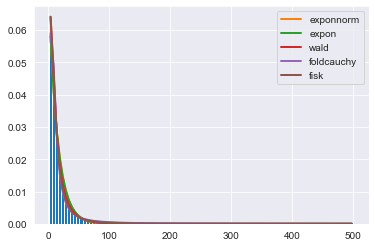

In [5]:
# fit num_items
f = Fitter(num_items)

f.fit()

f.summary()

In [6]:
f = Fitter(num_items, distributions='expon')
f.fit()
f.get_best(method='sumsquare_error')

{'expon': {'loc': 1.0, 'scale': 14.528563291255535}}

In [7]:
# Split data into sc and cc data
cc_data = data[data['WorkstationGroupID'] == 1]
sc_data = data[data['WorkstationGroupID'] == 8]
# calculate transaction time per item and turn into numpy array
cc_time_per_item = cc_data['TranTime'] / cc_data['ArtNum']
cc_time_per_item = cc_time_per_item.values
sc_time_per_item = sc_data['TranTime'] / sc_data['ArtNum']
sc_time_per_item = sc_time_per_item.values


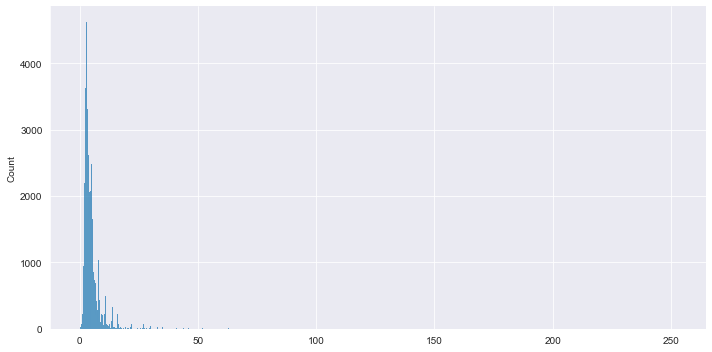

In [8]:
sns.displot(cc_time_per_item, kind='hist', aspect=2)

/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
laplace,0.000387,11545.388634,-2.412158e+06,inf
moyal,0.001194,10522.374783,-2.273358e+06,inf
gumbel_r,0.001968,12598.202966,-2.211856e+06,inf
hypsecant,0.002715,13422.668141,-2.172196e+06,inf
logistic,0.005397,15287.737247,-2.087539e+06,inf


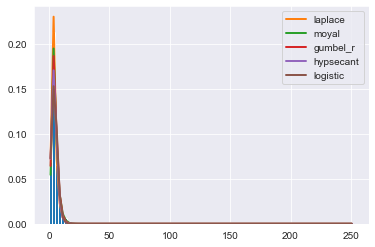

In [9]:
# find the best distribution to approximate cc_time_per_item
g = Fitter(cc_time_per_item)
g.fit()
g.summary()

In [10]:
g.get_best(method='sumsquare_error')

{'laplace': {'loc': 3.7777777777777777, 'scale': 2.1742325579116906}}

/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
gumbel_r,0.001552,5094.162912,-683683.765280,inf
cauchy,0.001716,1829.060009,-679657.624365,inf
laplace,0.002089,4722.163699,-671783.748779,inf
hypsecant,0.002660,5355.746306,-662105.177398,inf
logistic,0.003168,6002.270528,-655107.919935,inf


/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:4858: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/opt/homebrew/Caskroom/miniforge/base/envs/simtest/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


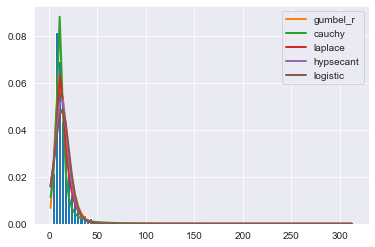

In [11]:
# find the best distribution to approximate sc_time_per_item
h = Fitter(sc_time_per_item)
h.fit()
h.summary()

In [12]:
h.get_best(method='sumsquare_error')

{'gumbel_r': {'loc': 11.224246069610276, 'scale': 6.208811868891992}}

In [13]:
# load the cashier data
df4 = pd.read_csv("POS_Data/POS_operator_logs_20171207-20171219.csv")
df5 = pd.read_csv("POS_Data/POS_operator_logs_20190213-20190226.csv")
df6 = pd.read_csv("POS_Data/POS_operator_logs_20190328-20190410.csv")

data2 = pd.concat((df4,df5,df6))

# split into sc and cc data

cc_data2 = data2[data2['WorkstationGroupID'] == 1]
sc_data2 = data2[data2['WorkstationGroupID'] == 8]

In [14]:
cc_data2['WorkstationID'].nunique()

16

In [15]:
sc_data2['WorkstationID'].nunique()

6